In [1]:
import urllib.request
import pandas as pd
import seaborn as sns
import os

# We can bring API later on to extract data
# contents = urllib.request.urlopen("https://data.api.abs.gov.au/rest/").read()

In [2]:
dfs = []
path = os.getcwd() + '/suburbs'

for root,dirs,files in os.walk(path):
    for filename in files:
       if filename.endswith(".csv"):
           suburb_name = filename.split(".")[0]
           df = pd.read_csv(f"{path}/{filename}")
           df['Suburb'] = suburb_name
           dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

df.head()

,Measure Code,Parent Description,Description,2011,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Suburb
0,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),NaN,NaN,NaN,NaN,7700.0,7793.0,7866.0,7931.0,8069.0,8249.0,NaN,baldhills
1,ERP_21,Estimated resident population - year ended 30 ...,Population density (persons/km2),NaN,NaN,NaN,NaN,576.6,583.6,589.0,593.9,604.2,617.7,NaN,baldhills
2,ERP_M_20,Estimated resident population - year ended 30 ...,Estimated resident population - males (no.),NaN,NaN,NaN,NaN,3829.0,3897.0,3951.0,3995.0,4078.0,4154.0,NaN,baldhills
3,ERP_F_20,Estimated resident population - year ended 30 ...,Estimated resident population - females (no.),NaN,NaN,NaN,NaN,3871.0,3896.0,3915.0,3936.0,3991.0,4095.0,NaN,baldhills
4,ERP_19,Estimated resident population - year ended 30 ...,Median age - males (years),NaN,NaN,NaN,NaN,35.2,35.3,35.5,35.7,35.4,35.7,NaN,baldhills


In [3]:
df_subset = df[df['Parent Description'] == 'Estimated resident population - year ended 30 June']
df_subset.head()

,Measure Code,Parent Description,Description,2011,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Suburb
0,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),NaN,NaN,NaN,NaN,7700.0,7793.0,7866.0,7931.0,8069.0,8249.0,NaN,baldhills
1,ERP_21,Estimated resident population - year ended 30 ...,Population density (persons/km2),NaN,NaN,NaN,NaN,576.6,583.6,589.0,593.9,604.2,617.7,NaN,baldhills
2,ERP_M_20,Estimated resident population - year ended 30 ...,Estimated resident population - males (no.),NaN,NaN,NaN,NaN,3829.0,3897.0,3951.0,3995.0,4078.0,4154.0,NaN,baldhills
3,ERP_F_20,Estimated resident population - year ended 30 ...,Estimated resident population - females (no.),NaN,NaN,NaN,NaN,3871.0,3896.0,3915.0,3936.0,3991.0,4095.0,NaN,baldhills
4,ERP_19,Estimated resident population - year ended 30 ...,Median age - males (years),NaN,NaN,NaN,NaN,35.2,35.3,35.5,35.7,35.4,35.7,NaN,baldhills


In [4]:
df_subset_melt = df_subset.melt(id_vars=['Measure Code', 'Parent Description','Description', 'Suburb']).dropna().sort_values(['Description','variable'])
df_subset_melt.rename({'variable': 'year'}, axis=1, inplace=True)
df_subset_melt

,Measure Code,Parent Description,Description,Suburb,year,value
216,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),baldhills,2018,7700.0
225,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),brackenridge,2018,17775.0
234,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),aspley,2018,12974.0
243,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),bridgemandowns,2018,9207.0
252,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),carseldine,2018,9657.0
...,...,...,...,...,...,...
502,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),brackenridge,2023,11914.0
511,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),aspley,2023,7989.0
520,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),bridgemandowns,2023,7236.0
529,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),carseldine,2023,6331.0


In [5]:
descriptions = df_subset_melt['Description'].unique()
descriptions

array(['Estimated resident population (no.)',
       'Estimated resident population - females (no.)',
       'Estimated resident population - males (no.)',
       'Median age - females (years)', 'Median age - males (years)',
       'Median age - persons (years)', 'Population density (persons/km2)',
       'Working age population (aged 15-64 years) (%)',
       'Working age population (aged 15-64 years) (no.)'], dtype=object)

In [6]:
df_subset_melt_dict = {}

for description in descriptions:
    df_subset_melt_dict[description] = df_subset_melt[df_subset_melt['Description'] == description]
    

In [7]:
df_subset_melt_dict[descriptions[0]]


,Measure Code,Parent Description,Description,Suburb,year,value
216,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),baldhills,2018,7700.0
225,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),brackenridge,2018,17775.0
234,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),aspley,2018,12974.0
243,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),bridgemandowns,2018,9207.0
252,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),carseldine,2018,9657.0
261,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),fitzgibbon,2018,13687.0
270,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),baldhills,2019,7793.0
279,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),brackenridge,2019,17789.0
288,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),aspley,2019,13056.0
297,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),bridgemandowns,2019,9612.0


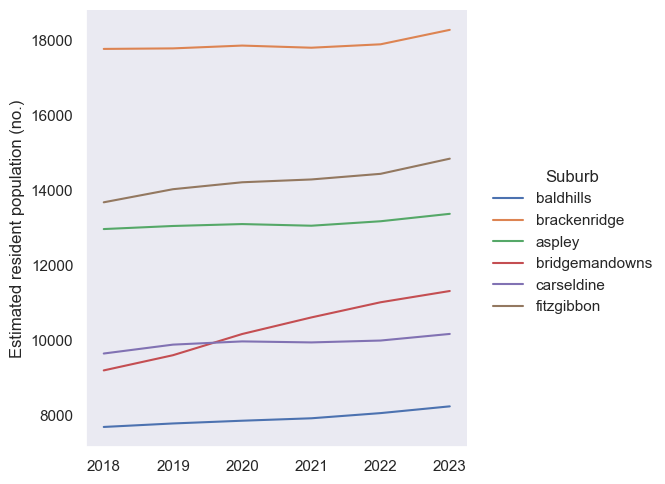

In [12]:
# sns.relplot(data=df_subset_melt_dict[descriptions[0]], x="year", y="value", kind="line", hue='Suburb')

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_subset_melt_dict[descriptions[0]],
    x="year", y="value",   hue="Suburb",
    kind="line"
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

#     # Plot every year's time series in the background
    sns.lineplot(
        data=df_subset_melt_dict[descriptions[0]], x="year", y="value",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", descriptions[0])
g.tight_layout()

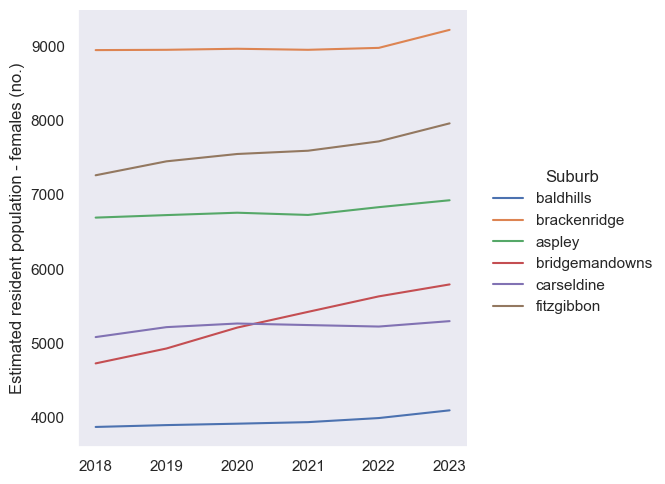

In [11]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_subset_melt_dict[descriptions[1]],
    x="year", y="value",   hue="Suburb",
    kind="line"
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

#     # Plot every year's time series in the background
    sns.lineplot(
        data=df_subset_melt_dict[descriptions[1]], x="year", y="value",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", descriptions[1])
g.tight_layout()